In [22]:
# Load in required libraries
library(tidyverse)
library(repr)
library(ggplot2)

In [23]:
sessions <- read_csv("data/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
sessions_summarized <- summary(sessions)
sessions_summarized

players_summarized <- summary(players)
players_summarized

players_experience <- unique(players$experience)
players_experience

players_gender <- unique(players$gender)
players_gender

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

## **Data Frame Observations**

### **Sessions**

**Number of Observations**: 1535

**Number of Variables**: 5

**hashedEmail (chr)**: hashed/hidden email of each user

**start_time (chr)**: the time where a player began their gaming session 

**end_time (chr)**: the time where a player stopped/concluded their gaming session

**original_start_time (dbl)**: the time where a player began their gaming session in milliseconds (mean: 1.719e+12)

**original_end_time (dbl)**: the time where a player stopped/concluded their gaming session in milliseconds (mean: 1.719e+12)

### **Players**

**Number of Observations**: 196

**Number of Variables**: 7

**experience (chr)**: the level of experience each player has in the game (5 subcategories: Pro, Veteran, Amateur, Regular, Beginner)

**subscribe (lgl)**: whether or not the player has subscribed to a game-related newsletter

**hashedEmail (chr)**: hashed/hidden email of each player

**played_hours (dbl)**: the amount of time each player has spent playing the game (mean: 5.846)

**name (chr)**: the first name of each player

**gender (chr)**: the gender of each user (7 subcategories: Male, Female, Non-binary, Prefer not to say, Agender, Two-Spirited, Other)

**Age (dbl)**: the age of each player in years (mean: 21.14)


## **Broad Question:**

### **Question 2:** 
Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

By using experience as my only predictor, more hours and more sessions correlates to more gameplay data which means regulars contribute the most amount of data.

## **Specific Question:**
Do more experienced players contribute more total gameplay time and sessions than less experienced players?

No, regular players contribute significantly more total gameplay time and sessions than more experienced players.

In [26]:
# Changing the time values for the original start time and original end time to be more readable
sessions <- sessions |>
    mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
           original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))

In [27]:
# Joined players and sessions
player_data <- players |>
  left_join(sessions, by = "hashedEmail")

In [28]:
# Created a session summary for each player including total sessions played per player
session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(total_sessions = n())

In [29]:
# Final joined dataset
final_data <- players |>
 left_join(session_summary, by = "hashedEmail")

In [30]:
# Sorted the data in descending order
final_data_sorted <- final_data |>
  arrange(desc(played_hours))
final_data_sorted

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,219
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20,95
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19,147
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,159
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23,310
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17,130
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17,37
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22,79
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27


In [31]:
#  The table for each quantitative variable in the players.csv data set.
mean_table <- players |>
    summarise(
        mean_age = mean(Age, na.rm = TRUE),
        mean_played_hours = mean(played_hours, na.rm = TRUE)
        )
mean_table
        

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


Warning message in scale_y_continuous(trans = "log10"):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_bar()`).”


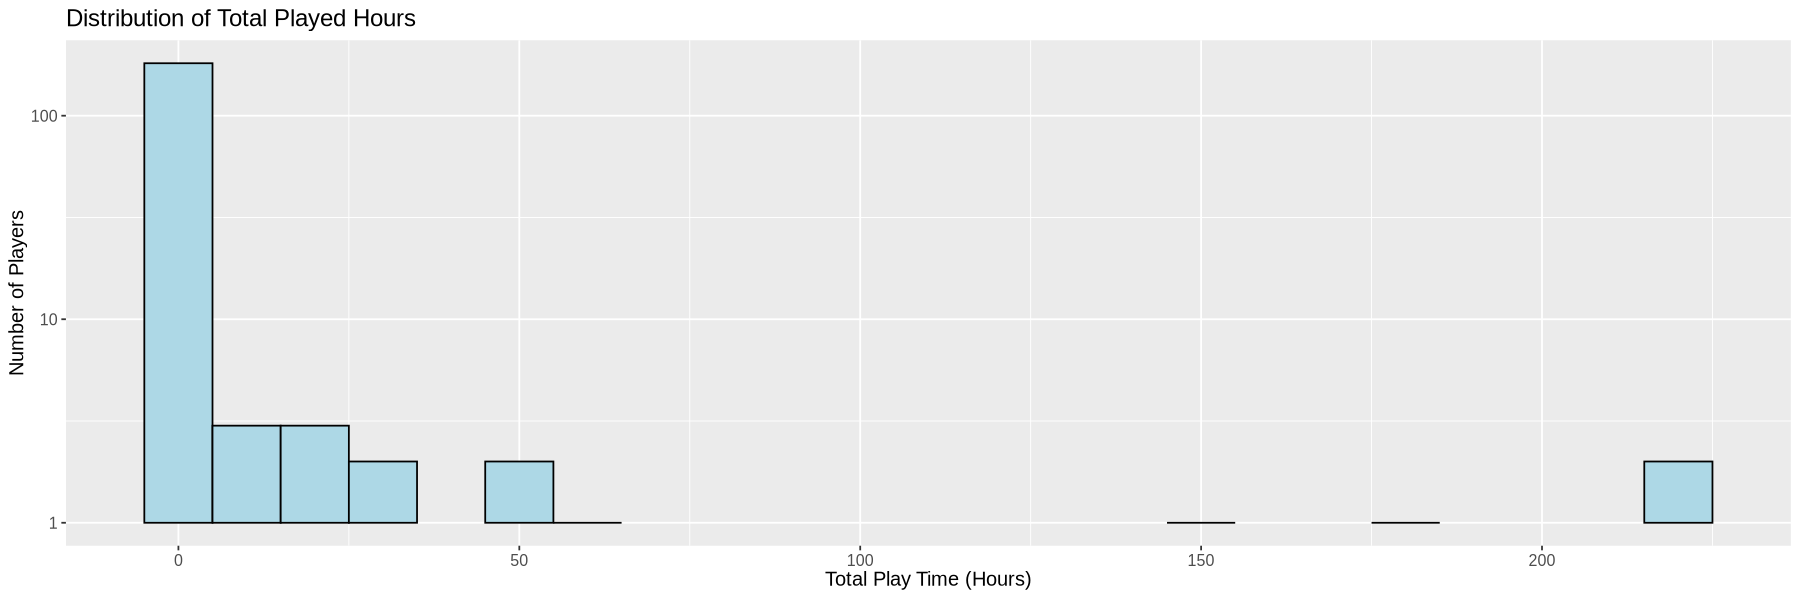

In [32]:
# Graph for the Distribution of Total Play Time (Hours)
options(repr.plot.width = 15, repr.plot.height = 5) 

played_hours_plot <- ggplot(final_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black") +
  labs(
    title = "Distribution of Total Played Hours",
    x = "Total Play Time (Hours)",
    y = "Number of Players") +
  theme(text = element_text(size = 12)) +
  scale_y_continuous(trans  = "log10")

played_hours_plot

Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


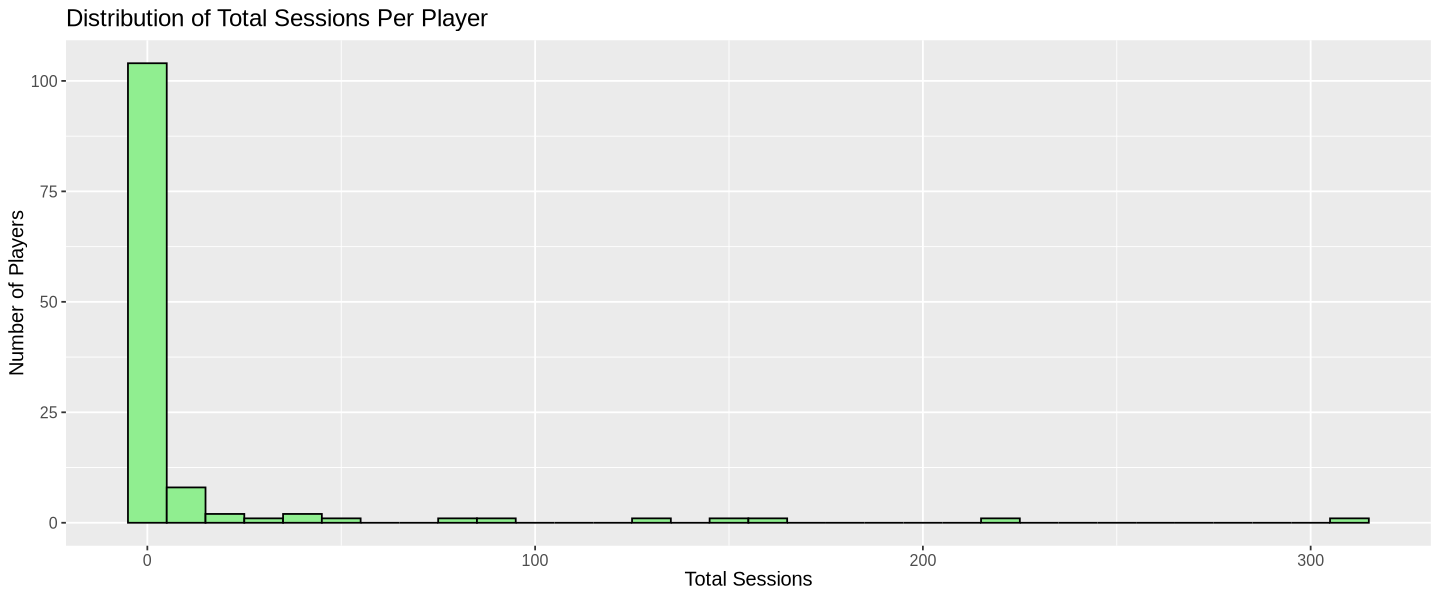

In [33]:
# Graph for the Distribution of Total Sessions Per Player
options(repr.plot.width = 12, repr.plot.height = 5) 

total_sessions_plot <- ggplot(final_data, aes(x = total_sessions)) +
  geom_histogram(binwidth = 10, fill = "lightgreen", color = "black") +
  labs(
    title = "Distribution of Total Sessions Per Player",
    x = "Total Sessions",
    y = "Number of Players") +
  theme(text = element_text(size = 12))
total_sessions_plot

In [34]:
# Ordered the final_data experience from lowest experience to highest
final_data <- final_data |>
  mutate(experience = factor(experience,
                             levels = c("Beginner", "Regular", "Amateur", "Veteran", "Pro")))

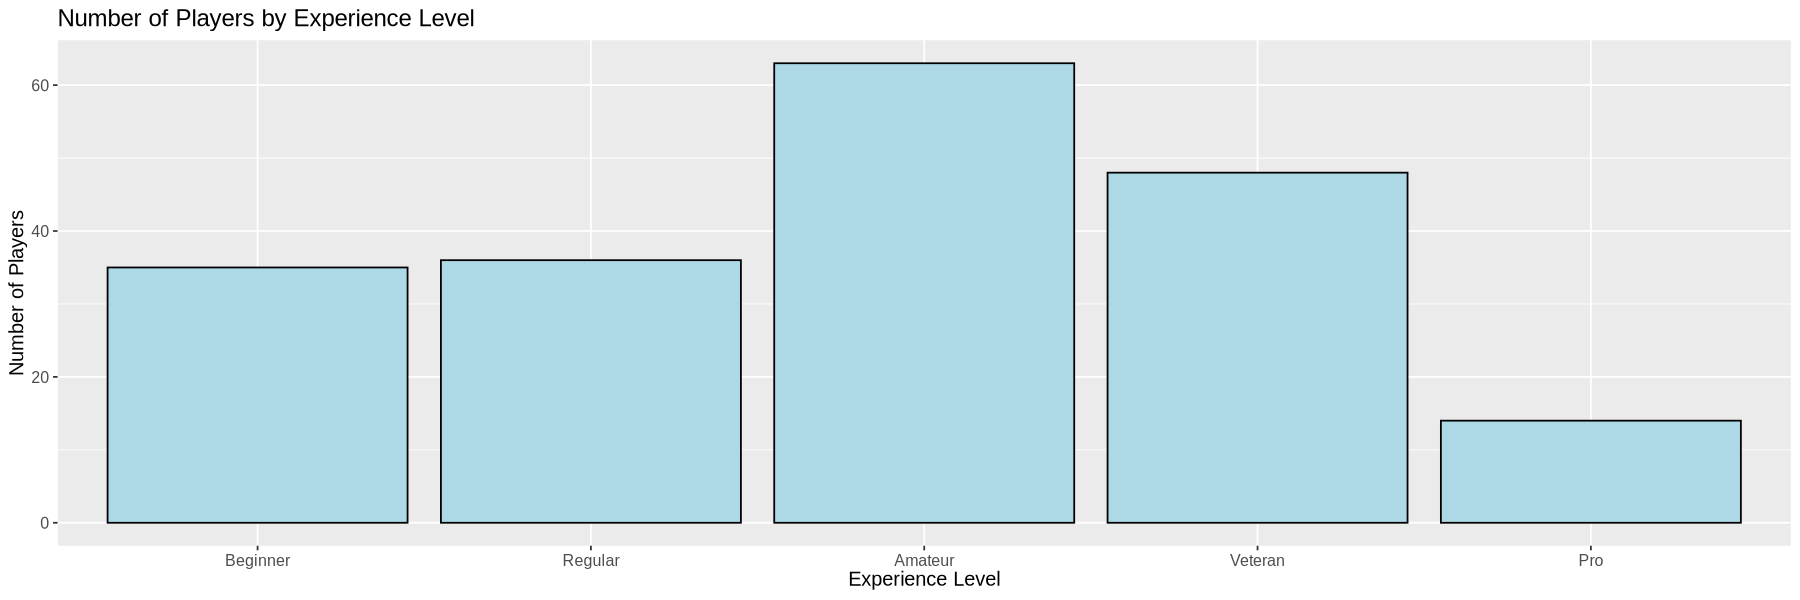

In [35]:
# Graph for the Distribution of Number of Players by Experience Level
options(repr.plot.width = 15, repr.plot.height = 5) 

experience_plot <- ggplot(final_data, aes(x = experience)) +
  geom_bar(fill = "lightblue", color = "black") +
  labs(
    title = "Number of Players by Experience Level",
    x = "Experience Level",
    y = "Number of Players") +
  theme(text = element_text(size = 12))
experience_plot 

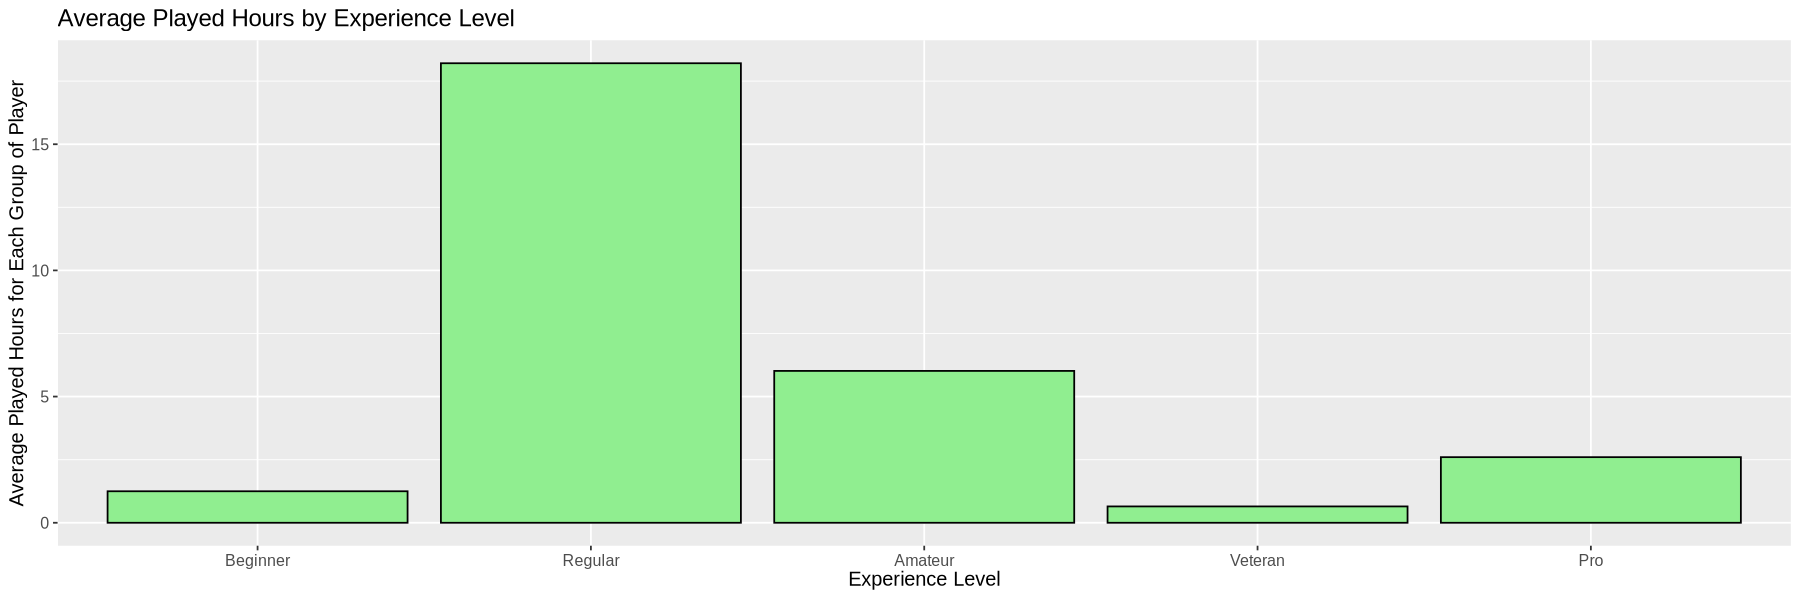

In [36]:
# Graph for the Distribution of Average Play Time in hours by Experience Level
experience_summary <- final_data |>
  group_by(experience) |>
  summarise(mean_played_hours = mean(played_hours, na.rm = TRUE))

options(repr.plot.width = 15, repr.plot.height = 5) 

experience_summary_plot <- ggplot(experience_summary, aes(x = experience, y = mean_played_hours)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(
    title = "Average Played Hours by Experience Level",
    x = "Experience Level",
    y = "Average Played Hours for Each Group of Player"
  ) +
 theme(text = element_text(size = 12))
experience_summary_plot

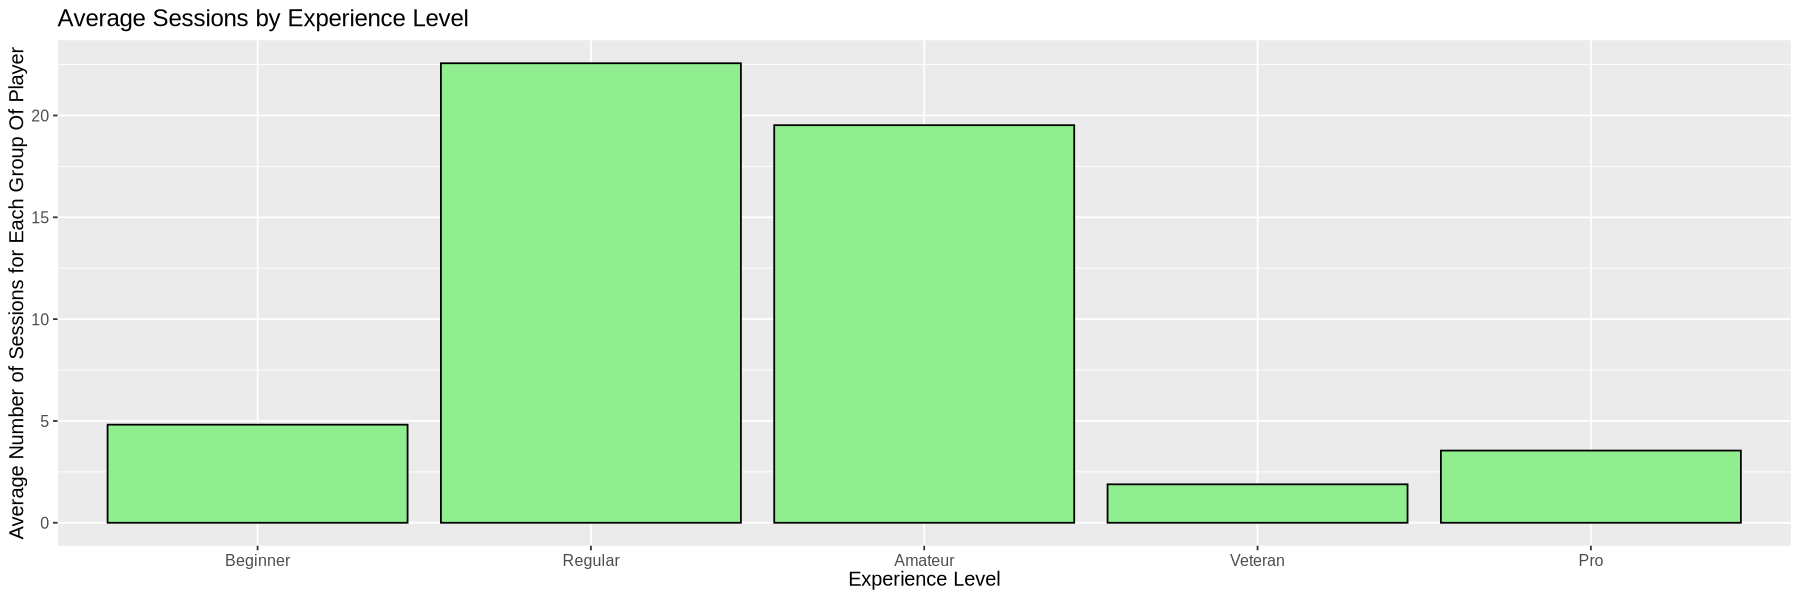

In [37]:
# Graph for the Distribution of Average Number of Sessions by Experience Level
options(repr.plot.width = 15, repr.plot.height = 5) 

experience_sessions_summary <- final_data |>
  group_by(experience) |>
  summarise(mean_sessions = mean(total_sessions, na.rm = TRUE))

experience_sessions_summary_plot <- ggplot(experience_sessions_summary, aes(x = experience, y = mean_sessions)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(
    title = "Average Sessions by Experience Level",
    x = "Experience Level",
    y = "Average Number of Sessions for Each Group Of Player") + 
theme(text = element_text(size = 12))
experience_sessions_summary_plot

For my specific question, I want to use a linear regression model as my predictive method. My goal is to find out what "kind" of player can contribute the most amount of gameplay data, using experience as the primary predictor variable for this goal. The variables played_hours and total_sessions will represent how much a player contributes to the research project. Since both numbers are numerical, linear regression would be well-suited for this type of question because it models the relationship between numerical outcomes and one or more explanatory variables. In my case, I want to quantify how gameplay contribution changes as experience level increases. This method allows me to measure the expected change in total play time or total sessions for each increase in experience level. One assumption when using linear regression is how the response variable should have a linear relationship with experience or else it will not fit well. Additionally, we are assuming that the residuals stay roughly the same no matter what the model predicts. Although using linear regression may seem like a great choice, one drawback is it may not capture non-linear patterns in gameplay behaviour. If there are lots of outliers such as having a small amount of players with lots of playtime, it can have an influence on the regression line and make the predictions inaccurate. To compare models and see which is easiest to interpret, I will use RMSE to measure prediction accuracy and test whether adding more player features improves the basic model that only used experience. For data processing, I would wrangle and merge the players and sessions datasets to compute each player’s total play time and total number of sessions. Afterwards, I would split the data into an 80% training and 20% testing set. The 80% will be used to train the model and the remaining 20% is used to evaluate it. This split will be performed before fitting the model and I may use 5-fold-cross-validation because the size is around 500 players which is an appropriate size.